In [2]:
# imports the neccessary python modules
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

In [3]:
# reads & stores the train data in a pandas dataframe
df_train = pd.read_csv("/Users/nialdaly/Documents/ey_nextwave/data/data_train.csv", index_col=False)

# drops first (unneccessary column)
df_train = df_train.drop(df_train.columns[0], axis=1)

# prints out the top 5 rows
df_train.head(5)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


In [5]:
# implements the rule that outlines the limits of the city center of Atlanta
df_train['city_entry'] = np.where(
    (df_train['x_entry'] >= 3750901.5068) & (df_train['x_entry'] <= 3770901.5068) &
    (df_train['y_entry'] >= -19268905.6133) & (df_train['y_entry'] <= -19208905.6133), 
    1, 0)

df_train.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_entry
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,0


In [7]:
# info on the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814262 entries, 0 to 814261
Data columns (total 12 columns):
hash             814262 non-null object
trajectory_id    814262 non-null object
time_entry       814262 non-null object
time_exit        814262 non-null object
vmax             256769 non-null float64
vmin             256769 non-null float64
vmean            270778 non-null float64
x_entry          814262 non-null float64
y_entry          814262 non-null float64
x_exit           814262 non-null float64
y_exit           814262 non-null float64
city_entry       814262 non-null int64
dtypes: float64(7), int64(1), object(4)
memory usage: 74.5+ MB


In [8]:
# describes the training data
df_train.describe()

,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_entry
count,256769.000000,256769.000000,270778.000000,8.142620e+05,8.142620e+05,8.142620e+05,8.142620e+05,814262.000000
mean,2.680249,2.279469,2.454799,3.760411e+06,-1.922153e+07,3.760426e+06,-1.922181e+07,0.291157
std,7.591053,7.118452,7.160578,8.974393e+03,7.632234e+04,8.904451e+03,7.515560e+04,0.454296
min,-1.000000,-1.000000,-1.000000,3.741027e+06,-1.938291e+07,3.740998e+06,-1.937688e+07,0.000000
25%,0.000000,-1.000000,0.000000,3.755174e+06,-1.927454e+07,3.755359e+06,-1.927308e+07,0.000000
50%,0.000000,0.000000,0.000000,3.760071e+06,-1.923020e+07,3.760076e+06,-1.923031e+07,0.000000
75%,0.500000,0.220000,0.440000,3.767509e+06,-1.916999e+07,3.767455e+06,-1.917193e+07,1.000000
max,162.000000,162.000000,162.000000,3.777099e+06,-1.904266e+07,3.777055e+06,-1.904666e+07,1.000000


## Assessing Data Quality

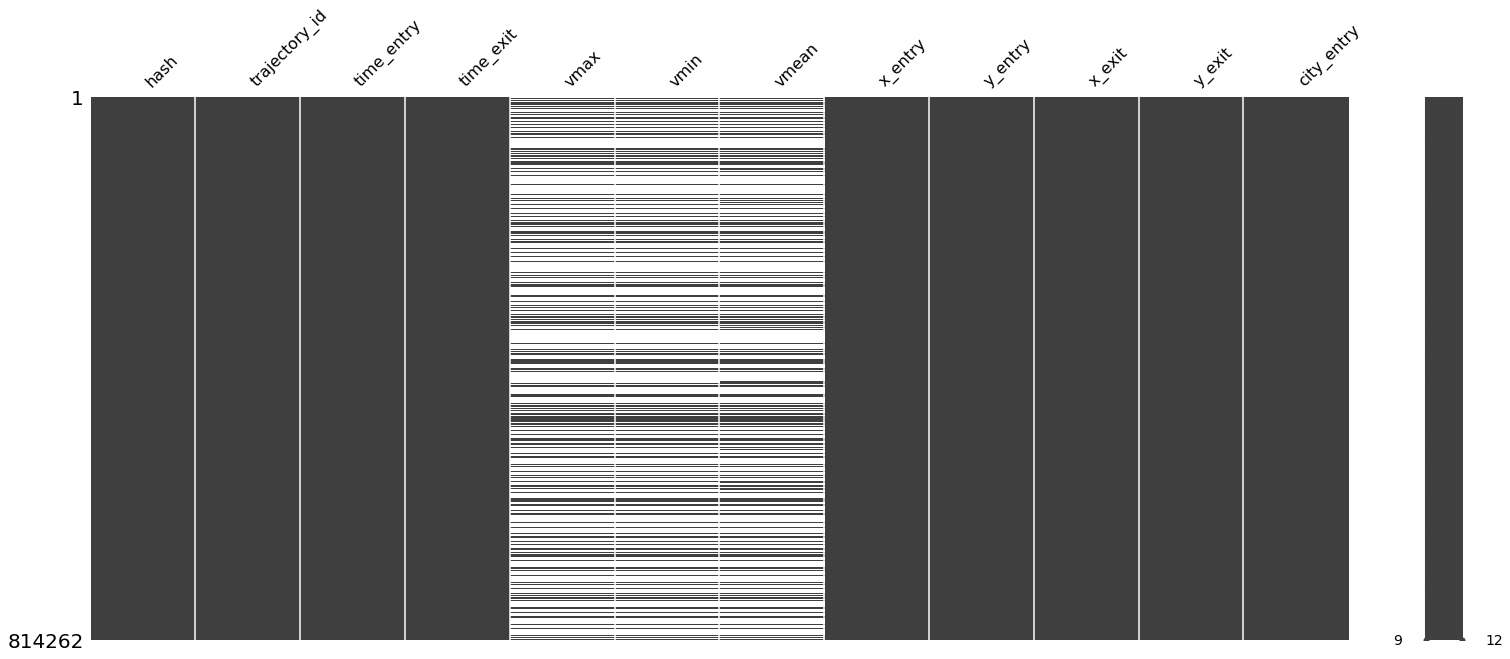

In [9]:
# white fields indictate NA's
msno.matrix(df_train)

In [10]:
# identifies the number of null values in each column
df_train.isnull().sum()

hash                  0
trajectory_id         0
time_entry            0
time_exit             0
vmax             557493
vmin             557493
vmean            543484
x_entry               0
y_entry               0
x_exit                0
y_exit                0
city_entry            0
dtype: int64

A significant portion of the training data has null values. Simply deleting rows with null values is not suitable in this case.

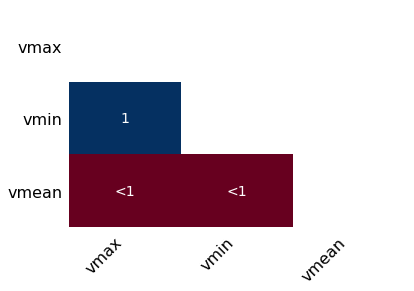

In [11]:
# correlation matric of missing values
msno.heatmap(df_train, figsize=(6,4))

In [12]:
# identifies duplicate rows
df_train[df_train.duplicated(keep=False)]

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_entry


In [13]:
# identifies outliers within the time_entry data
df_train.time_entry.loc[(df_train.time_entry < '00:00:00') | (df_train.time_entry > '23:59:00')]

Series([], Name: time_entry, dtype: object)

In [14]:
# identifies outliers within the time_exit data
df_train.time_exit.loc[(df_train.time_exit < '00:00:00') | (df_train.time_exit > '23:59:00')]

Series([], Name: time_exit, dtype: object)

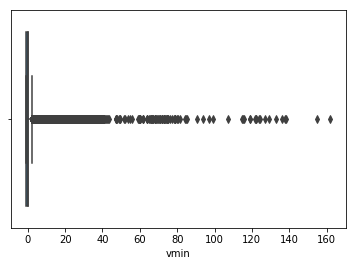

In [15]:
# attempting to identify outliers in the velocity data
sns.boxplot(x=df_train['vmin'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


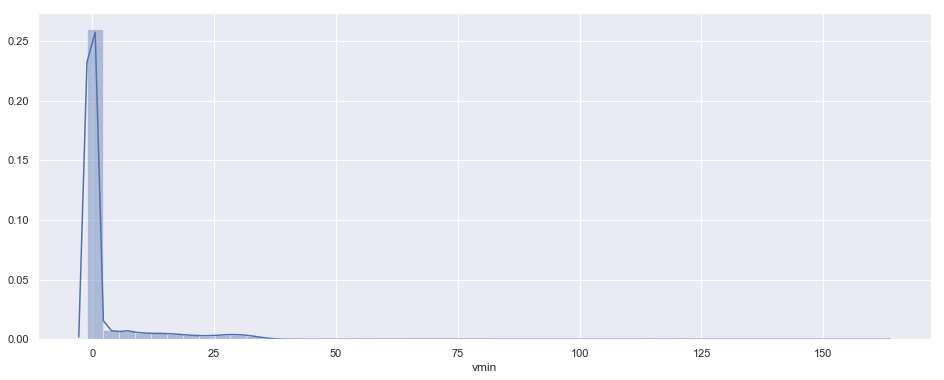

In [16]:
# visualises the distribution of the minimum velocities present in the dataset
sns.set(color_codes=True)
plot = sns.distplot(df_train.vmin.dropna(), color="b")
plot.figure.set_size_inches(16,6)

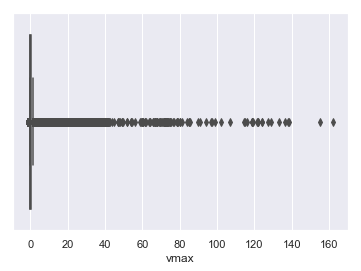

In [17]:
# attempting to identify outliers in the velocity data
sns.boxplot(x=df_train['vmax'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


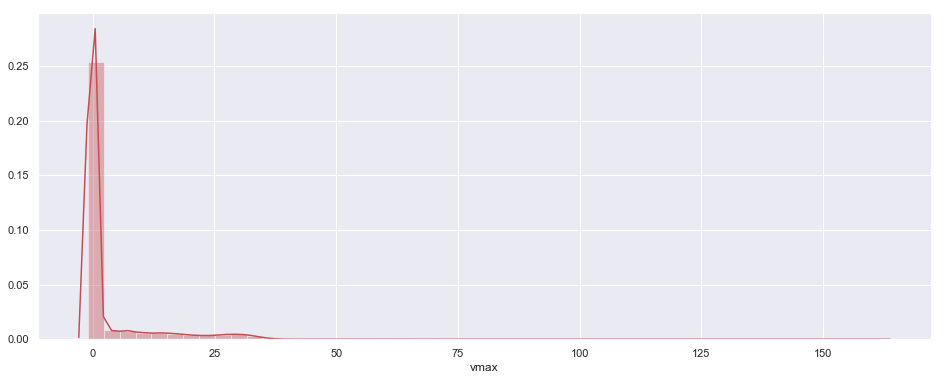

In [18]:
# visualises the distribution of the maximum velocities present in the dataset
sns.set(color_codes=True)
plot = sns.distplot(df_train.vmax.dropna(), color="r")
plot.figure.set_size_inches(16,6)

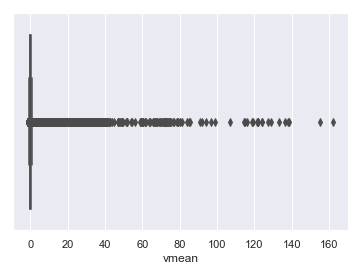

In [19]:
# attempting to identify outliers in the velocity data
sns.boxplot(x=df_train['vmean'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


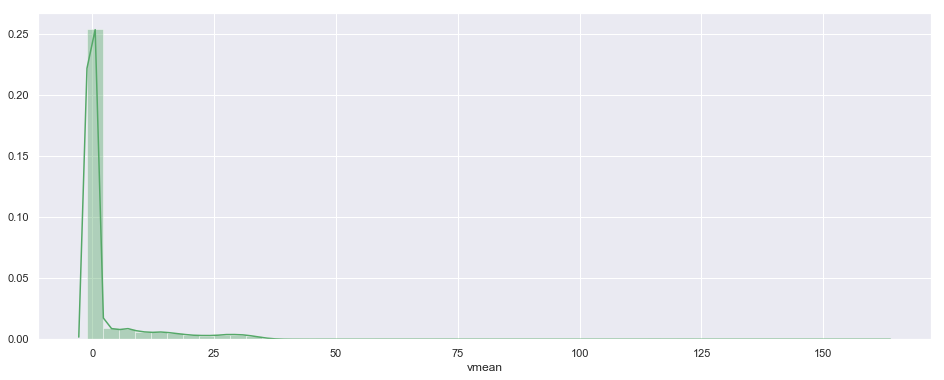

In [20]:
# visualises the distribution of the mean velocities present in the dataset
sns.set(color_codes=True)
plot = sns.distplot(df_train.vmean.dropna(), color="g")
plot.figure.set_size_inches(16,6)

### Trend Analysis

In [21]:
# df_train['hash'].mode()

In [22]:
# implements the rule that outlines the limits of the city center of Atlanta
df_train['city_center'] = np.where(
    (df_train['x_exit'] >= 3750901.5068) & (df_train['x_exit'] <= 3770901.5068) 
                             
                             , 1, 0)

df_train.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_entry,city_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,0,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,0,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,0,0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,0,0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,0,0


In [23]:
# all records between 3 and 4pm
df_train = df_train[(df_train['time_entry'] >= '15:00:00') & (df_train['time_exit'] <= '16:00:00')]

df_train.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_entry,city_center
5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,0,0
9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,0,0
20,0002124248b0ca510dea42824723ccac_31,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,NaN,NaN,NaN,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,0,1
28,000219c2a6380c307e8bffd85b5e404b_23,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,NaN,NaN,NaN,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,0,0
38,0002e7384d78cd2c2395f63e4b369f40_23,traj_0002e7384d78cd2c2395f63e4b369f40_23_14,15:25:21,15:25:21,NaN,NaN,NaN,3.775402e+06,-1.917662e+07,3.775402e+06,-1.917662e+07,0,0
